# COMS4062A - Probabilistic Graphical Models
# Assignment
# Heart disease/failure prediction using Bayesian Networks
# Luca von Mayer 2427051@students.wits.ac.za

# Section 2: Structure Learning 

imports

In [37]:
import os
import warnings
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from pgmpy.models import BayesianNetwork
from pgmpy.metrics import structure_score
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt
from pgmpy.metrics import correlation_score, structure_score
from pgmpy.estimators import *
warnings.simplefilter('ignore')


Reading in data


In [38]:
df = pd.read_csv("heartProcessed.csv")

X = (df.iloc[:, :-1])
y = (df.iloc[:, -1])

fs = SelectKBest(score_func=chi2, k=11)
f_best = fs.fit_transform(X, y)

top_features = sorted(zip(list(X.columns), fs.scores_), key=lambda x: x[1], reverse=True)

top_features



[('ChestPainType', 160.73687834127384),
 ('ExerciseAngina', 133.64013403064604),
 ('ST_Slope', 77.48668006913775),
 ('FastingBS', 50.296983033264),
 ('MaxHR', 47.749149990397534),
 ('Oldpeak', 41.65957974088896),
 ('Age', 31.620119595336885),
 ('Sex', 18.006243160731916),
 ('Cholesterol', 13.323582572380037),
 ('RestingECG', 1.2181357229212812),
 ('RestingBP', 1.093997553657631)]

In [39]:
data = pd.DataFrame(f_best, columns=[i[0] for i in top_features[:fs.k]])
data[df.columns[-1]] = y


joint_probability = data.groupby([data.columns], axis=1).size()/data.shape[0]

joint_probability

Age               0.001089
ChestPainType     0.001089
Cholesterol       0.001089
ExerciseAngina    0.001089
FastingBS         0.001089
HeartDisease      0.001089
MaxHR             0.001089
Oldpeak           0.001089
RestingBP         0.001089
RestingECG        0.001089
ST_Slope          0.001089
Sex               0.001089
dtype: float64

# Different Learning methods and hyperparameters (seeing which is best)

Setting up the save file

In [40]:
result_file = "structResults.csv"

# Check if the file exists, and if not, create it with headers
with open(result_file, 'w', newline='') as file:
        file.write("SLTechnique,ScoringMethod,CorrelationScore,StructureScore\n")

# Initialize a set to store unique rows
unique_rows = set()

# PC

In [41]:
def structPC(score):
    SLTechnique = "PC"
    ScoringMethod = score

    est = PC(data)
    dag = est.estimate(ci_test=ScoringMethod)

    plt.figure(figsize=(8, 8))
    dag.add_nodes_from(data.columns)
    pos = nx.kamada_kawai_layout(dag)
    nx.draw(dag, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=12, width=1.5)
    plt.title(f"Bayesian Network: {SLTechnique} using {ScoringMethod}")
    plt.show()


    model = BayesianNetwork(dag)

    corr_score = correlation_score(model, data, test='log_likelihood', significance_level=0.05)
    print(f"Correlation Score: {corr_score}")


    struc_score = structure_score(model, data, scoring_method="bic")
    print(f"Structure Score: {struc_score}")


    new_row = f"{SLTechnique},{ScoringMethod},{corr_score},{struc_score}"
    if new_row not in unique_rows:
        with open(result_file, 'a') as file:
            file.write(new_row + "\n")
        unique_rows.add(new_row)

    

  0%|          | 0/5 [00:00<?, ?it/s]

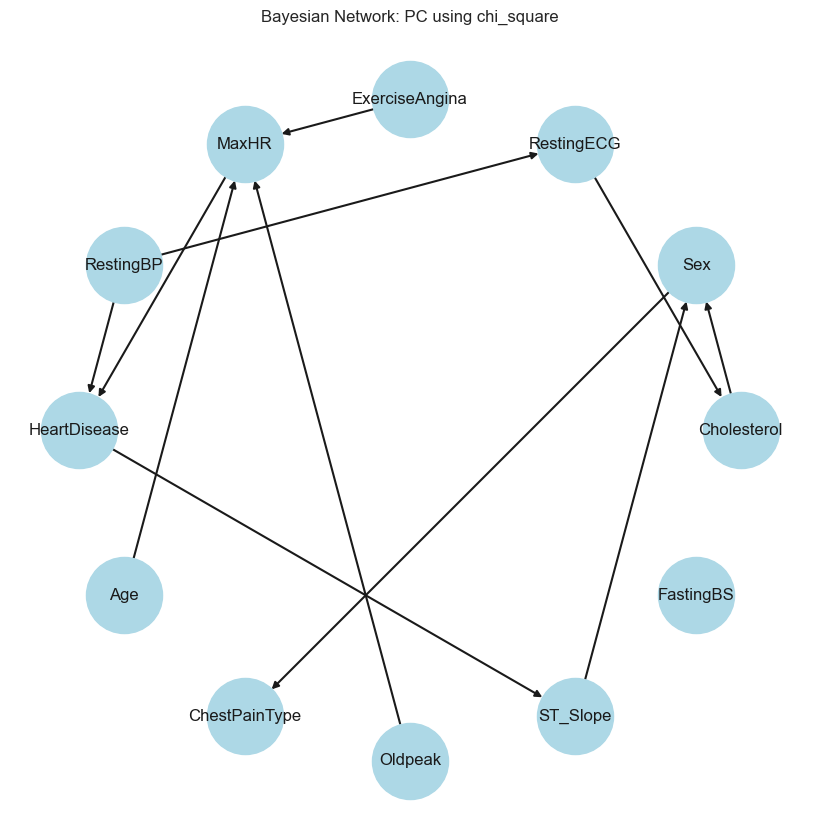

Correlation Score: 0.4571428571428572
Structure Score: -9682.56039764853


In [42]:
structPC("chi_square")

  0%|          | 0/5 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


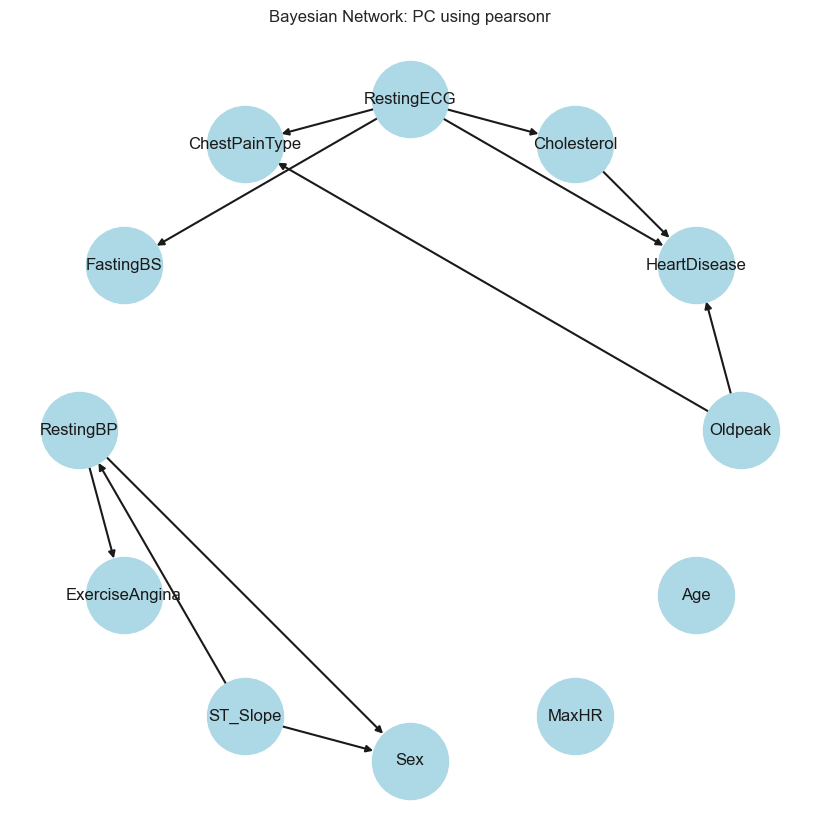

Correlation Score: 0.3157894736842105
Structure Score: -10081.153799030186


In [43]:
structPC("pearsonr")


  0%|          | 0/5 [00:00<?, ?it/s]

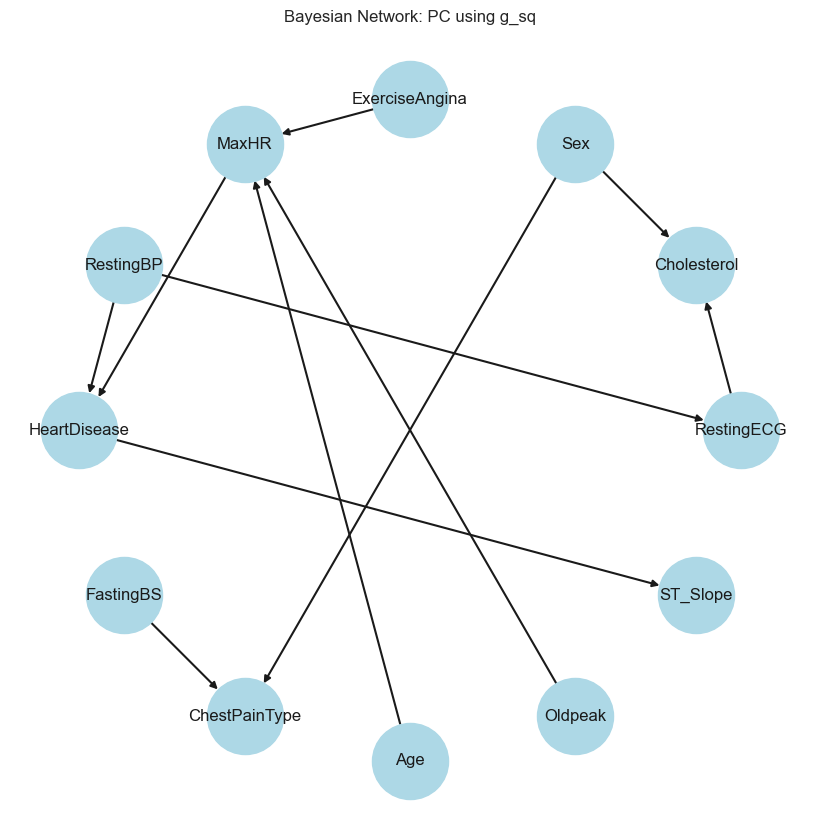

Correlation Score: 0.36
Structure Score: -9940.999413513779


In [44]:
structPC("g_sq")

  0%|          | 0/5 [00:00<?, ?it/s]

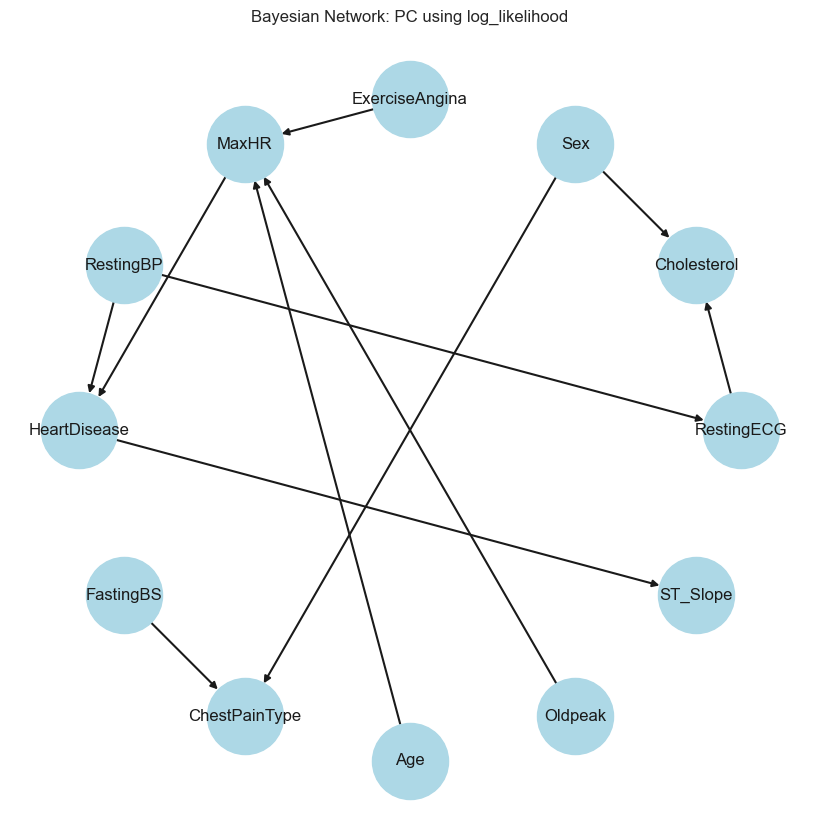

Correlation Score: 0.36
Structure Score: -9940.999413513779


In [45]:
structPC("log_likelihood")

  0%|          | 0/5 [00:00<?, ?it/s]

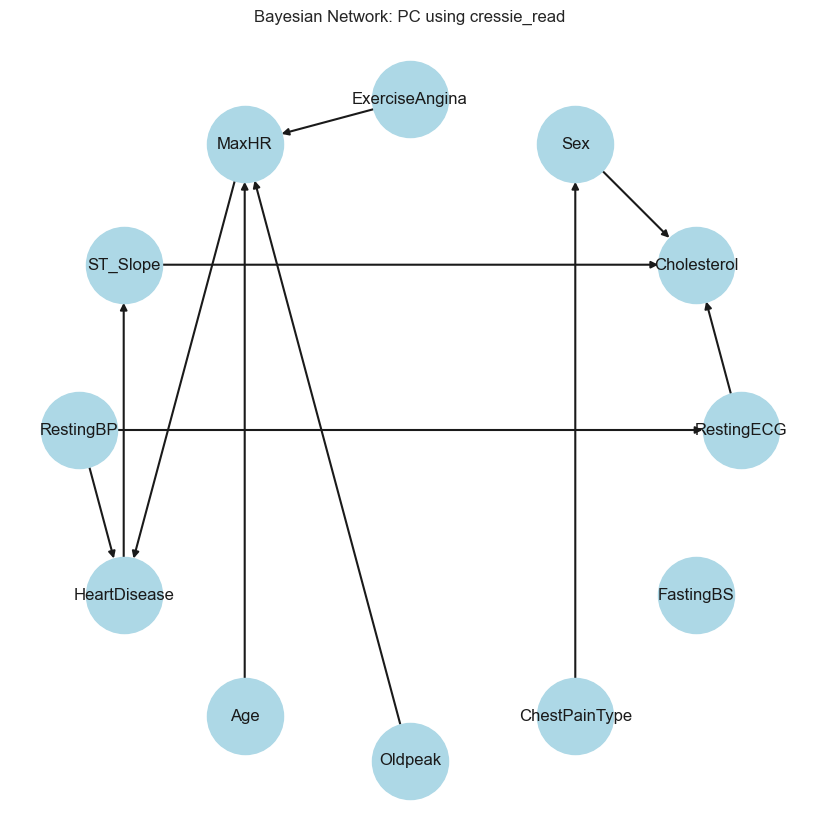

Correlation Score: 0.3404255319148936
Structure Score: -9913.021730626539


In [46]:
structPC("cressie_read")

# Hill Climb Search

In [47]:
def structHill(ScoringMethod, scoring_method):
    SLTechnique = "HillClimbSearch"

    est = HillClimbSearch(data=data)
    dag = est.estimate(
    scoring_method=scoring_method, max_indegree = 3
)

    plt.figure(figsize=(8, 8))
    dag.add_nodes_from(data.columns)
    pos = nx.kamada_kawai_layout(dag)
    nx.draw(dag, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=12, width=1.5)
    plt.title(f"Bayesian Network: {SLTechnique} using {ScoringMethod}")
    plt.show()


    model = BayesianNetwork(dag)

    corr_score = correlation_score(model, data, test='log_likelihood', significance_level=0.05)
    print(f"Correlation Score: {corr_score}")


    struc_score = structure_score(model, data, scoring_method="bic")
    print(f"Structure Score: {struc_score}")


    new_row = f"{SLTechnique},{ScoringMethod},{corr_score},{struc_score}"
    if new_row not in unique_rows:
        with open(result_file, 'a') as file:
            file.write(new_row + "\n")
        unique_rows.add(new_row)

  0%|          | 0/1000000 [00:00<?, ?it/s]

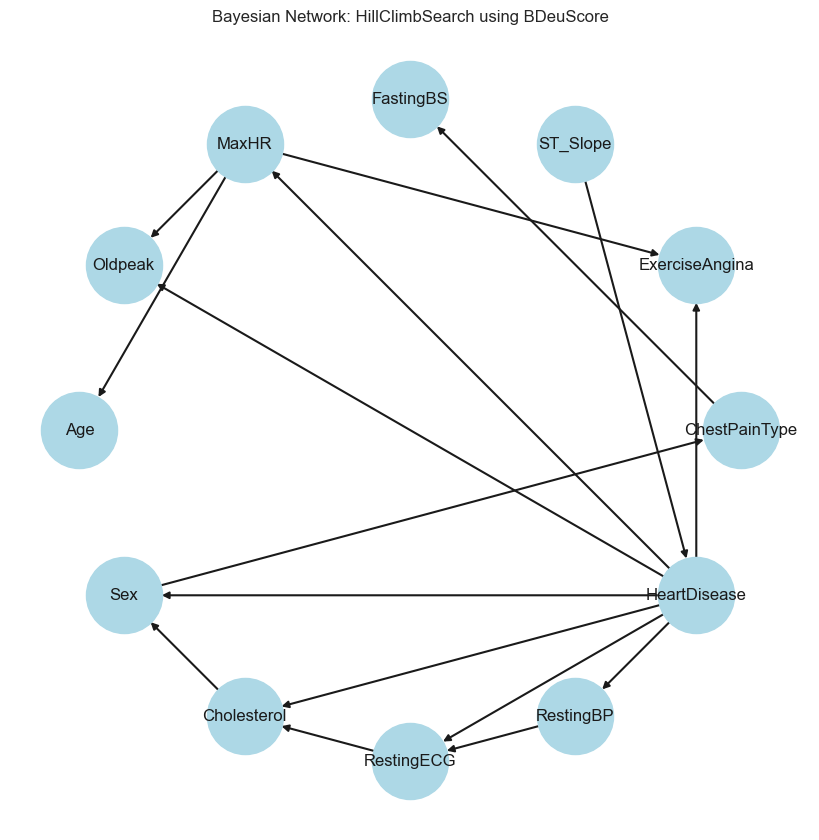

Correlation Score: 0.0
Structure Score: -9481.483039527271


In [48]:
structHill("BDeuScore", BDeuScore(data=data))

  0%|          | 0/1000000 [00:00<?, ?it/s]

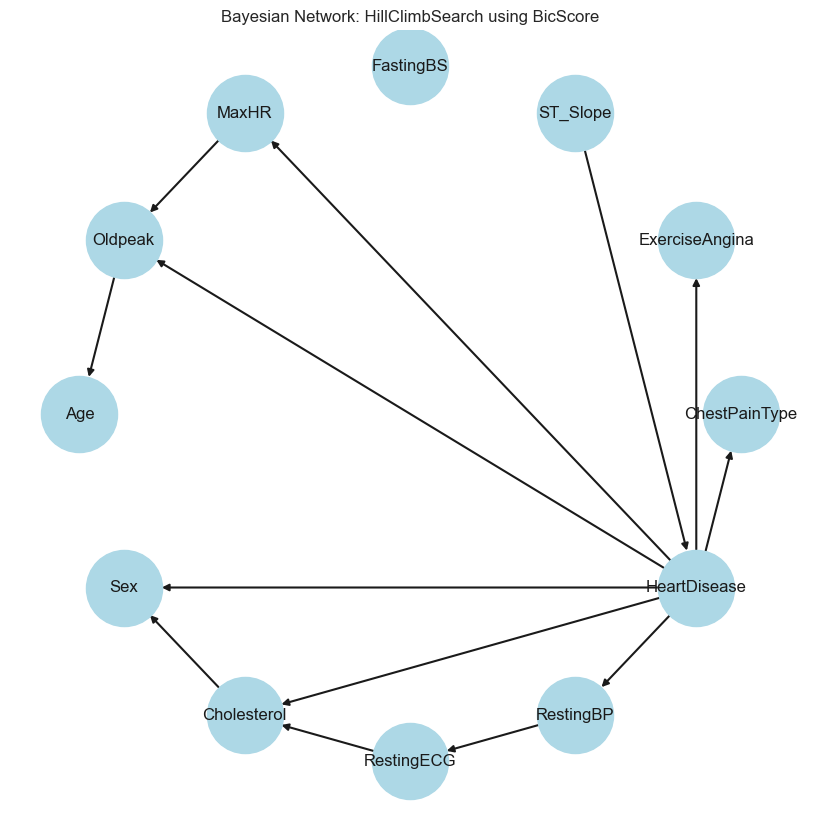

Correlation Score: 0.5
Structure Score: -9436.554539324077


In [49]:
structHill("BicScore", BicScore(data=data))

  0%|          | 0/1000000 [00:00<?, ?it/s]

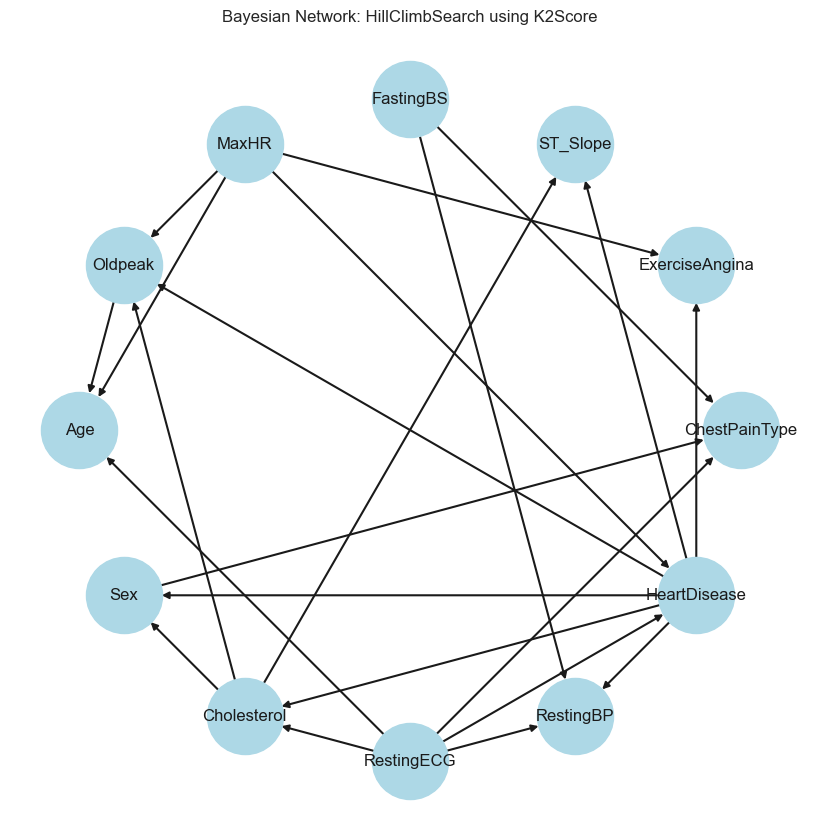

Correlation Score: 0.5263157894736842
Structure Score: -11573.204742229234


In [50]:
structHill("K2Score", K2Score(data=data))

  0%|          | 0/1000000 [00:00<?, ?it/s]

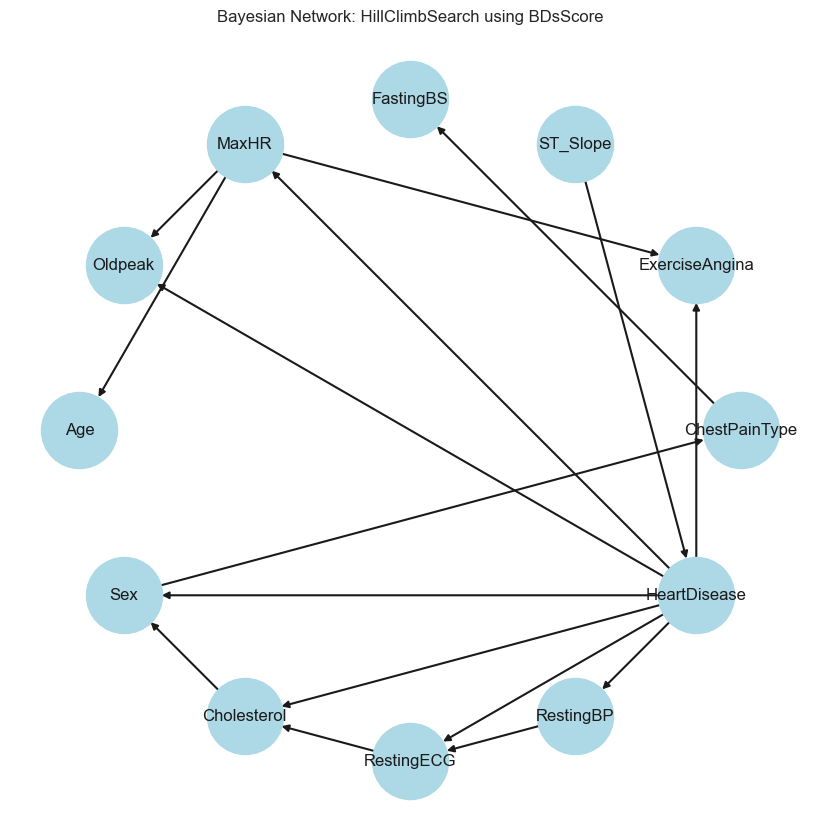

Correlation Score: 0.0
Structure Score: -9481.483039527271


In [51]:
structHill("BDsScore", BDsScore(data=data))

# Tree Search

Building tree:   0%|          | 0/66.0 [00:00<?, ?it/s]

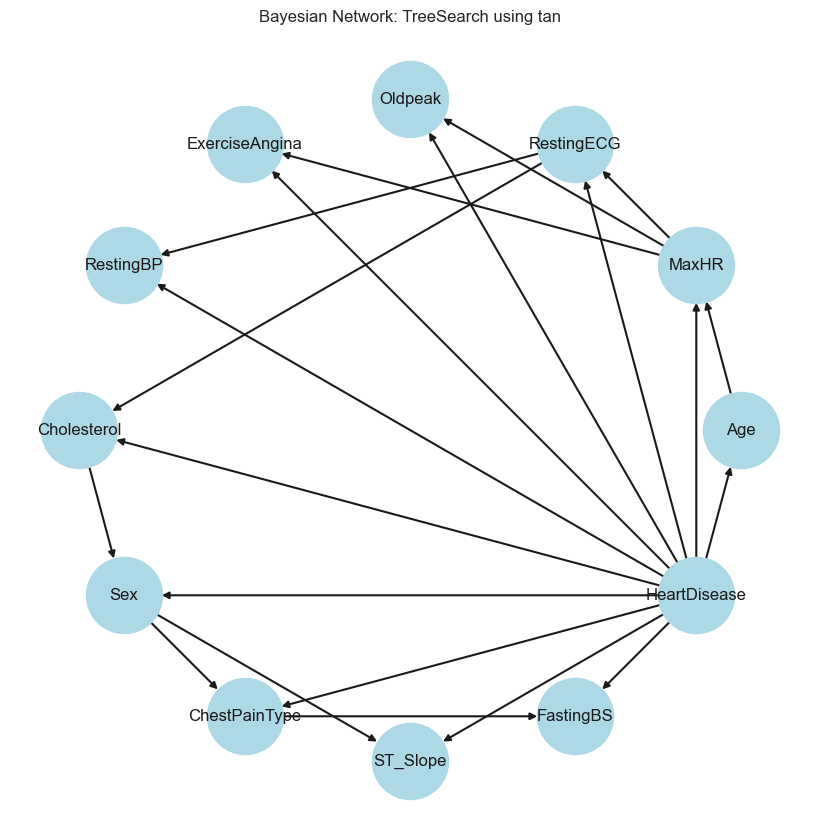

Correlation Score: 0.0
Structure Score: -9730.223259657587


In [52]:
SLTechnique = "TreeSearch"
ScoringMethod = 'tan'

est = TreeSearch(data, root_node='Age')
dag = est.estimate(estimator_type='tan', class_node='HeartDisease')

plt.figure(figsize=(8, 8))
dag.add_nodes_from(data.columns)
pos = nx.kamada_kawai_layout(dag)
nx.draw(dag, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=12, width=1.5)
plt.title(f"Bayesian Network: {SLTechnique} using {ScoringMethod}")
plt.show()


model = BayesianNetwork(dag)

corr_score = correlation_score(model, data, test='log_likelihood', significance_level=0.05)
print(f"Correlation Score: {corr_score}")


struc_score = structure_score(model, data, scoring_method="bic")
print(f"Structure Score: {struc_score}")


new_row = f"{SLTechnique},{ScoringMethod},{corr_score},{struc_score}"
if new_row not in unique_rows:
    with open(result_file, 'a') as file:
        file.write(new_row + "\n")
    unique_rows.add(new_row)

Building tree:   0%|          | 0/66.0 [00:00<?, ?it/s]

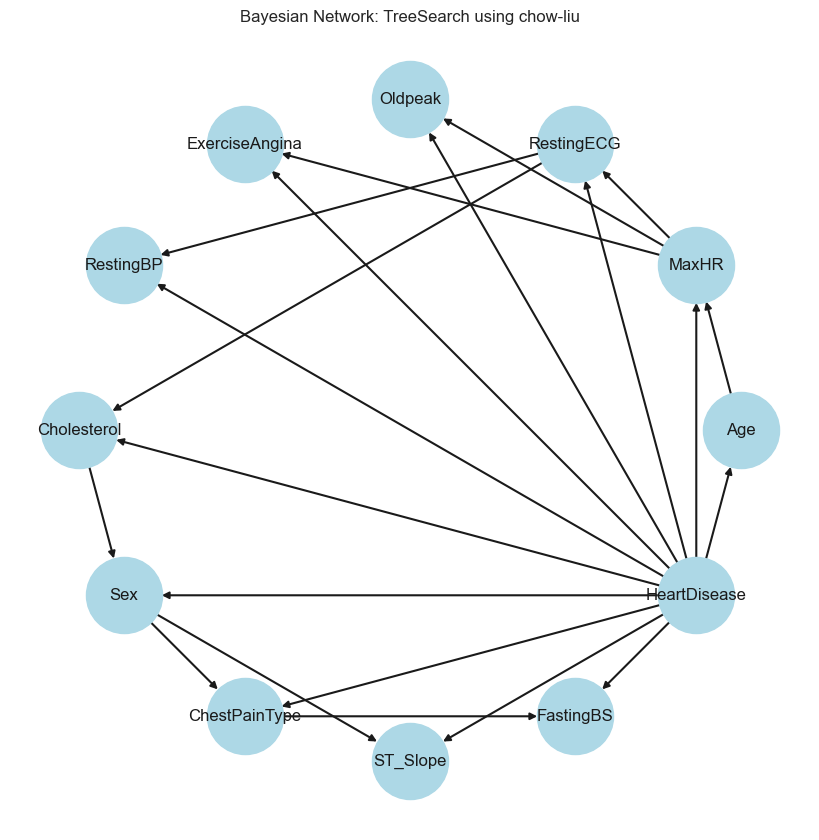

Correlation Score: 0.0
Structure Score: -9730.223259657587


In [53]:
SLTechnique = "TreeSearch"
ScoringMethod = 'chow-liu'

est = TreeSearch(data)
model = est.estimate(estimator_type='chow-liu')

plt.figure(figsize=(8, 8))
dag.add_nodes_from(data.columns)
pos = nx.kamada_kawai_layout(dag)
nx.draw(dag, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=12, width=1.5)
plt.title(f"Bayesian Network: {SLTechnique} using {ScoringMethod}")
plt.show()


model = BayesianNetwork(dag)

corr_score = correlation_score(model, data, test='log_likelihood', significance_level=0.05)
print(f"Correlation Score: {corr_score}")


struc_score = structure_score(model, data, scoring_method="bic")
print(f"Structure Score: {struc_score}")


new_row = f"{SLTechnique},{ScoringMethod},{corr_score},{struc_score}"
if new_row not in unique_rows:
    with open(result_file, 'a') as file:
        file.write(new_row + "\n")
    unique_rows.add(new_row)

# Plotting Results

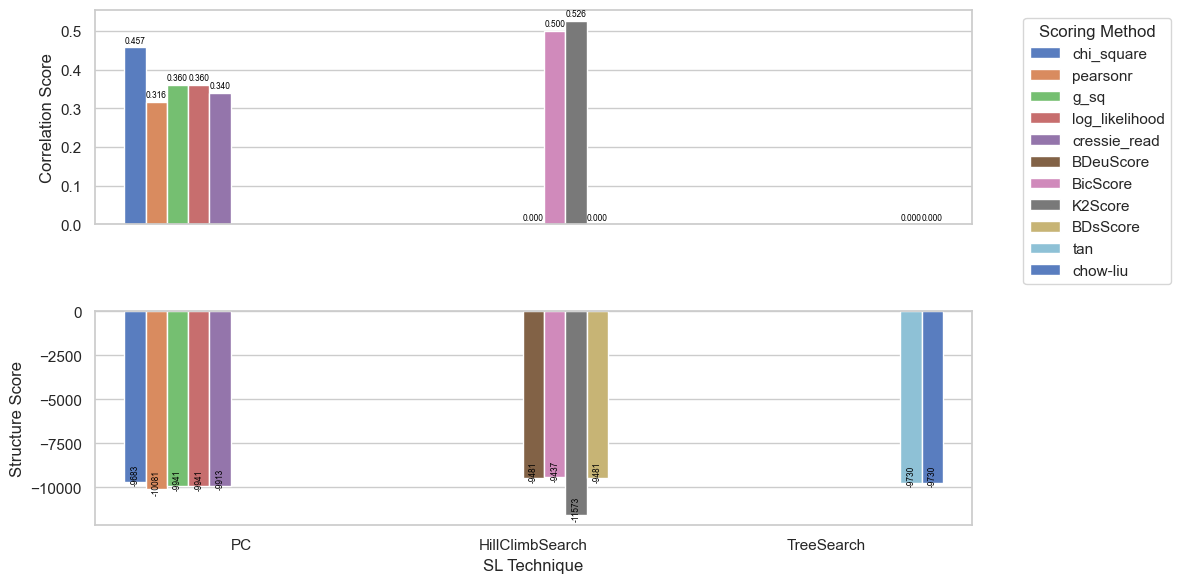

In [54]:
dataPlot = pd.read_csv("structResults.csv")

# Set style
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Plot Correlation Score
ax1 = sns.barplot(data=dataPlot, x="SLTechnique", y="CorrelationScore", hue="ScoringMethod", palette="muted", ax=axes[0])

# Add labels to the bars
for p in ax1.patches:
    ax1.annotate(f"{p.get_height():.3f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=6, color='black', xytext=(0, 5), textcoords='offset points')

ax1.set_xlabel("")
ax1.set_ylabel("Correlation Score")
ax1.set_xticklabels([])
ax1.legend(title="Scoring Method", bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot Structure Score
ax2 = sns.barplot(data=dataPlot, x="SLTechnique", y="StructureScore", hue="ScoringMethod", palette="muted", ax=axes[1])

# Add labels to the bars (sideways)
for p in ax2.patches:
    ax2.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=6, color='black', rotation=90, xytext=(0, 5), textcoords='offset points')

ax2.set_xlabel("SL Technique")
ax2.set_ylabel("Structure Score")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)  # Horizontal x-axis labels
ax2.legend_.remove()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
